## Подготовка данных

In [59]:
# ячейка импорта библиотек
import pandas as pd
from IPython.display import Image
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [60]:
# сделаем так, чтобы jupyter не выдавал ошибки
import warnings
warnings.filterwarnings("ignore")

In [61]:
df_full = pd.read_csv('gold_recovery_full_new.csv')
df_test = pd.read_csv('gold_recovery_test_new.csv')
df_train = pd.read_csv('gold_recovery_train_new.csv')

datasets = [df_full, df_train, df_test]

In [62]:
for s in datasets:
    display(s.head(2))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


In [63]:
for s in datasets:
    display(s.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

### Описание данных

##### Технологический процесс
* Rougher feed — исходное сырье;
* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant;
 
 Xanthate **— ксантогенат (промотер, или активатор флотации);
 
 Sulphate — сульфат (на данном производстве сульфид натрия);
 
 Depressant — депрессант (силикат натрия).
 
 
* Rougher process (англ. «грубый процесс») — флотация;
* Rougher tails — отвальные хвосты;
* Float banks — флотационная установка;
* Cleaner process — очистка;
* Rougher Au — черновой концентрат золота;
* Final Au — финальный концентрат золота.


##### Этапы
* rougher — флотация;
* primary_cleaner — первичная очистка;
* secondary_cleaner — вторичная очистка;
* final — финальные характеристики.

##### Типы параметров 
* input — параметры сырья;
* output — параметры продукта;
* state — параметры, характеризующие текущее состояние этапа;
* calculation — расчётные характеристики.

##### Параметры этапов
* air amount — объём воздуха;
* fluid levels — уровень жидкости;
* feed size — размер гранул сырья;
* feed rate — скорость подачи.

#### Целевые признаки

* эффективность обогащения чернового концентрата `rougher.output.recovery`;
* эффективность обогащения финального концентрата `final.output.recovery`.

### Расчет эффективности обогащения

Чтобы определить, насколько точно данные об эффективности обогащения в датасете отражают действительность, произведем рассчеты в ручную и найдем **MAE** между ними и значением признака `rougher.output.recovery`.

Эффективность рассчитывается по следующей формуле:

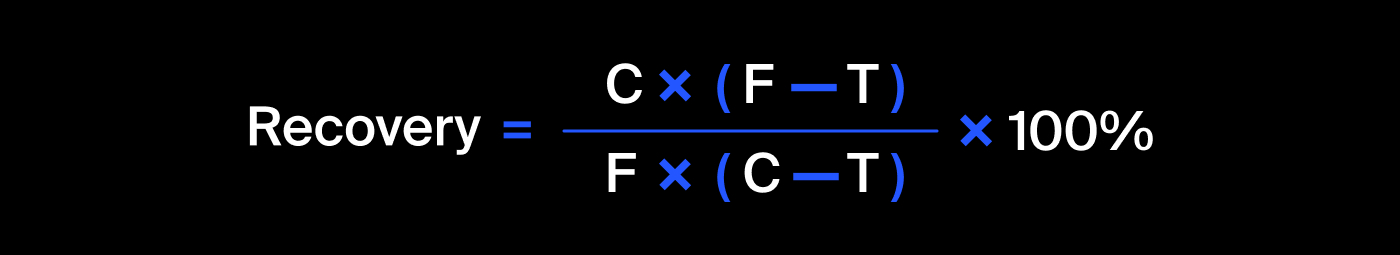

In [64]:
Image('formula.png')

Где:
* C — доля золота в концентрате **после** флотации/очистки;
* F — доля золота в сырье/концентрате **до** флотации/очистки;
* T — доля золота в отвальных хвостах **после** флотации/очистки.

In [65]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

In [66]:
recovery_calcs = ((C * (F - T)) / (F * (C - T))) * 100
df_recovery = pd.DataFrame({"rougher_recovery":df_train["rougher.output.recovery"],"recovery_calcs":recovery_calcs}).dropna()
MAE = mean_absolute_error(df_recovery["rougher_recovery"],df_recovery["recovery_calcs"])
print(f"MAE={MAE}")

MAE=9.73512347450521e-15


##### Вывод
 
Получили значение метрики очень близкой к нулю, а это значит, данные в таблице рассчитаны **верно**. 

### Анализ признаков, недоступных в тестовой выборке

Посмотрим, каких данных нет в тестовой выборке. 

In [67]:
train_columns = df_train.columns.tolist()
test_columns = df_test.columns.tolist()

missing_columns = list(set(train_columns) - set(test_columns))
missing_columns.sort()
missing_columns, len(missing_columns)

(['final.output.concentrate_ag',
  'final.output.concentrate_au',
  'final.output.concentrate_pb',
  'final.output.concentrate_sol',
  'final.output.recovery',
  'final.output.tail_ag',
  'final.output.tail_au',
  'final.output.tail_pb',
  'final.output.tail_sol',
  'primary_cleaner.output.concentrate_ag',
  'primary_cleaner.output.concentrate_au',
  'primary_cleaner.output.concentrate_pb',
  'primary_cleaner.output.concentrate_sol',
  'primary_cleaner.output.tail_ag',
  'primary_cleaner.output.tail_au',
  'primary_cleaner.output.tail_pb',
  'primary_cleaner.output.tail_sol',
  'rougher.calculation.au_pb_ratio',
  'rougher.calculation.floatbank10_sulfate_to_au_feed',
  'rougher.calculation.floatbank11_sulfate_to_au_feed',
  'rougher.calculation.sulfate_to_au_concentrate',
  'rougher.output.concentrate_ag',
  'rougher.output.concentrate_au',
  'rougher.output.concentrate_pb',
  'rougher.output.concentrate_sol',
  'rougher.output.recovery',
  'rougher.output.tail_ag',
  'rougher.output.t

##### Вывод

Мы получили список из названий колонок и их количество, которых нет в датасете тестововой выборки. По типу параметра `output` определяем, что в данных нет получаемых на разных этапах продуктов, а также рассчетов `calculation`, завязанных на этих продуктах. Необходимо будет добавить отсутсвующие столбцы в тестовую выборку.

### Предобработка данных

#### Добавление целевых признаков в тестовую выборку

In [68]:
df_test['rougher.output.recovery'] = df_train['rougher.output.recovery']
df_test['final.output.recovery'] = df_train['final.output.recovery']

#### Пропущенные значения

In [69]:
df_full = df_full.dropna()
df_train = df_train.dropna()
df_test = df_test.dropna()

#### Ненужные столбцы

In [70]:
df_train = df_train.drop('date', axis=1)
df_full = df_full.drop('date', axis=1)
df_test = df_test.drop('date', axis=1)

##### Вывод

Мы подготовили данные, проверив корректность рассчетов и избавившись от пропущенных значений.

## Анализ данных

### Изменение концентрации металлов на различных этапах

Для того, чтобы посмотреть, как меняется концентрация металлов на различных этапах, построим гистограммы. Данные возьмем из **df_full**. 

In [71]:
def build_hist(df, columns, labels, title):
    plt.figure(figsize=[9, 9])
    plt.grid(visible=True)
    plt.xlabel(title, fontsize=15)
    for column in columns:
        plt.hist(df[column], bins = 50, alpha=.5)
    plt.legend(labels, loc='upper left', fontsize=12)    
    plt.show()

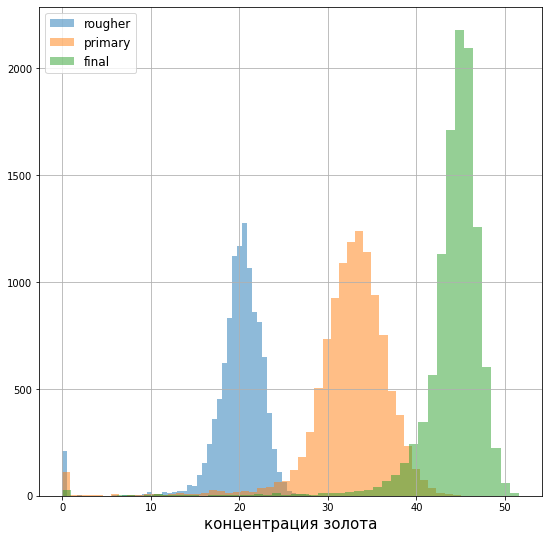

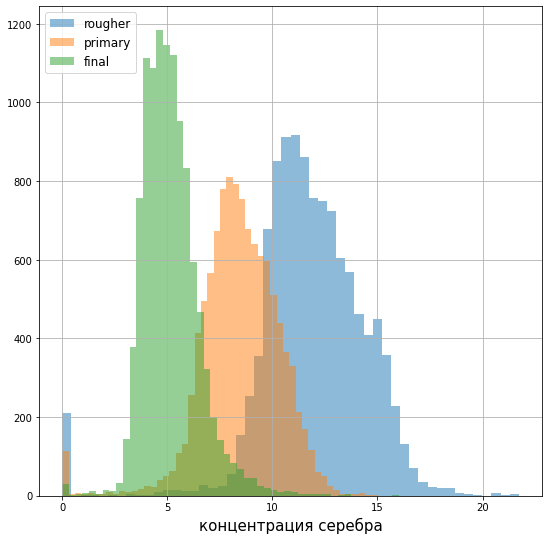

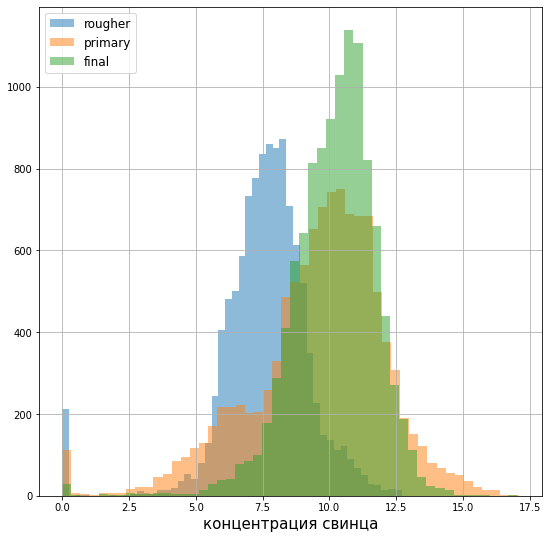

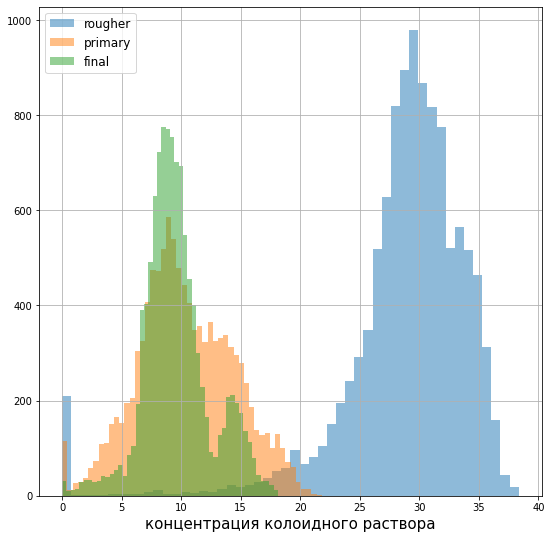

In [72]:
au_columns = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
ag_columns = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
pb_columns = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
sol_columns = ['rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol']
metal_columns = au_columns + ag_columns + pb_columns + sol_columns
labels_proc = ['rougher', 'primary', 'final']
build_hist(df_train, au_columns, labels_proc, 'концентрация золота')
build_hist(df_train, ag_columns, labels_proc, 'концентрация серебра')
build_hist(df_train, pb_columns, labels_proc, 'концентрация свинца')
build_hist(df_train, sol_columns, labels_proc, 'концентрация колоидного раствора')

Видим, что распределение у данных нормальное, о золоте со смещением вправо, о серебре - влево. На всех гистограммах мы можем заметить **выбросы** в нулевой отметке. Нужно избавиться от этой аномалии, так как в дальнейшем это может негативно повлиять на обучение нейросети. За порог возьмем концентрацию больше единицы. 

In [73]:
for column in metal_columns:
    df_train = df_train[df_train[column] > 1]  

### Распределение гранул сырья на этапе флотации и первичной очистки 

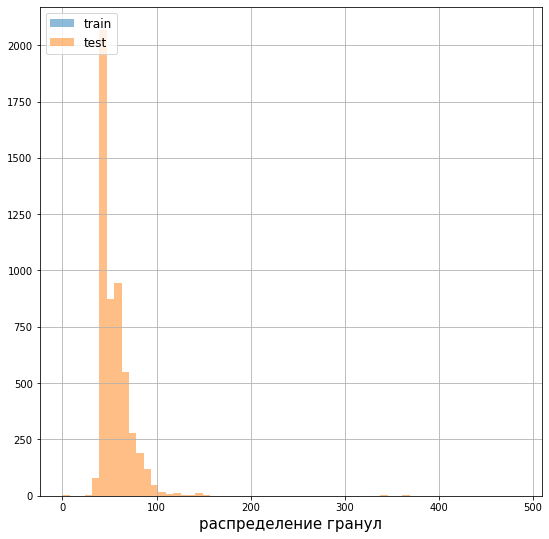

In [74]:
plt.figure(figsize=[9, 9])
plt.grid(visible=True)
plt.xlabel('распределение гранул', fontsize=15)
plt.hist(df_train['rougher.input.feed_size'], density=True, bins = 50, alpha=.5)
plt.hist(df_test['rougher.input.feed_size'], bins = 50, alpha=.5)
plt.legend(['train', 'test'], loc='upper left', fontsize=12)    
plt.show()

На графике видно, что в тренировочной выборке данные распределены нормально, а в тестовой - по распределению Пуассона. От этого мало что зависит, нам важно то, чтобы значения которые есть в тестовой выборке были в обучающей и модель знала как с ними работать. Также здесь имеются выбросы после 100, удалять их не нужно. 

### Распределение концентрации всех веществ на различных этапах

In [75]:
overall_rough_concentrate = df_train['rougher.input.feed_au'] + df_train['rougher.input.feed_ag'] + df_train['rougher.input.feed_sol'] + df_train['rougher.input.feed_pb']
overall_primary_concentrate = df_train['rougher.output.concentrate_au'] + df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_sol'] + df_train['rougher.output.concentrate_pb']
overall_final_concentrate = df_train['final.output.concentrate_au'] + df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_sol'] + df_train['final.output.concentrate_pb']

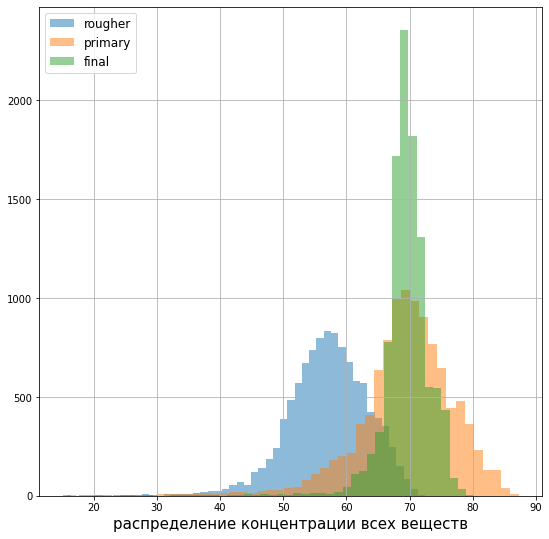

In [76]:
plt.figure(figsize=[9, 9])
plt.grid(visible=True)
plt.xlabel('распределение концентрации всех веществ', fontsize=15)
plt.hist(overall_rough_concentrate, bins = 50, alpha=.5)
plt.hist(overall_primary_concentrate, bins = 50, alpha=.5)
plt.hist(overall_final_concentrate, bins = 50, alpha=.5)
plt.legend(labels_proc, loc='upper left', fontsize=12)    
plt.show()

Данные на всех этапах распределены нормально, со смещением вправо. 

##### Вывод

Мы провели исследовательский анализ данных в ходе которого выяснили, что данные в обучающей в целом распределены нормально, что положительно скажется на обучении модели. Более того, мы вновь подготовили данные для обучения, убрав аномалии. Из проведенного анализа видно, что концентрация золота растет пропорционально этапам технологического процесса, так же растет свинец. Концентрация серебра и колоидного раствора падает. Интересно, что результаты распределения всех веществ показали тенденцию к росту всеобщей концентрации.  

## Модель

### Функция для вычисления метрики качества

Напишем функцию, которая вычислит для нас метрику качества нашей будущей модели. Эта метрика будет считать процент отклонения предсказанных данных от истинных. Вычисляется метрика по данной формуле:

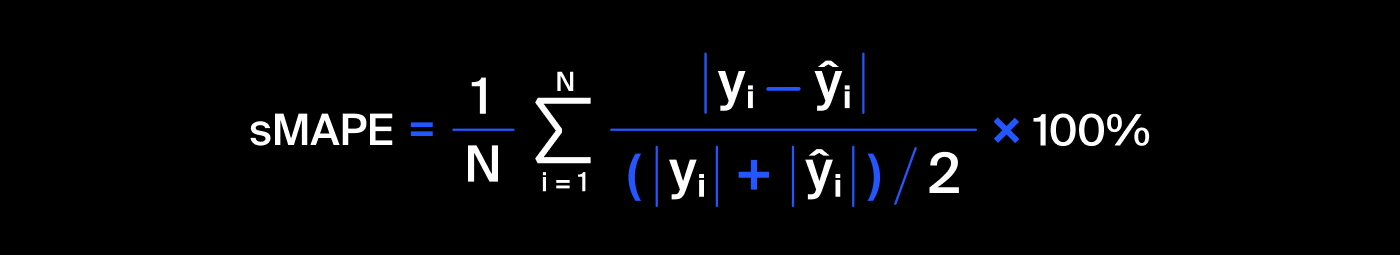

In [77]:
Image('smape.png')

Следующая формула объеденит метрики для этапа флотации и финальных показаний, что даст нам итоговую оценку модели:

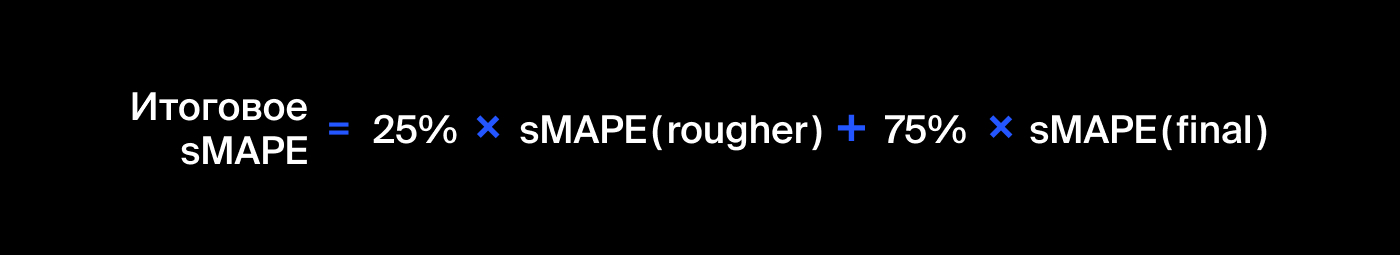

In [78]:
Image('smape_final.png')

Напишем функцию **sMAPE**.

In [79]:
def smape_score(true, predict):
    return 1 / len(true) * ( abs(true - predict) / ( (abs(true) + abs(predict)) * 0.5) ).sum() * 100
 

In [80]:
def smape_resulting(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

In [81]:
score = make_scorer(smape_score, greater_is_better=False)

### Подготовка признаков 

Подготовим признаки для обучения и рассчета **sMAPE** по формуле. Необходимо выделить признаки вместе с целевым для этапа флотации и для все выборки в целом. В `features_train` пойдут столбцы, которые есть и в тестовой и в тренировочной выборке. Важно, чтобы набор признаков был одинаковым, иначе машина может неправильно обучиться.  

In [82]:
features_train = df_train.drop(missing_columns, axis=1)
target_train_rougher = df_train['rougher.output.recovery']
target_train_final = df_train['final.output.recovery']

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)

### Обучение и проверка моделей

In [83]:
def model_scoring(model,name):
    score_rough = cross_val_score(model, features_train, target_train_rougher, scoring = score, cv = 3).mean()
    score_final = cross_val_score(model, features_train, target_train_final, scoring = score, cv = 3).mean()
    smape_fin = smape_resulting(score_rough, score_final)

    print(name, ':')
    print('    sMAPE rougher: {:.2f} %'.format(score_rough))
    print('    sMAPE final: {:.2f} %'.format(score_final))
    print('Итоговое sMAPE: {:.2f} %'.format(smape_fin))

In [84]:
%%time

model_lr = LinearRegression()

model_scoring(model_lr, 'Линейная регрессия')

Линейная регрессия :
    sMAPE rougher: -8.63 %
    sMAPE final: -10.54 %
Итоговое sMAPE: -10.06 %
CPU times: user 313 ms, sys: 262 ms, total: 575 ms
Wall time: 124 ms


In [85]:
%%time

model_dtr = DecisionTreeRegressor()

model_scoring(model_dtr, 'Дерево решений')

Дерево решений :
    sMAPE rougher: -9.60 %
    sMAPE final: -13.73 %
Итоговое sMAPE: -12.70 %
CPU times: user 3.03 s, sys: 294 ms, total: 3.33 s
Wall time: 3 s


In [86]:
%%time

model_rfr = RandomForestRegressor()

model_scoring(model_rfr, 'Случайный лес')

Случайный лес :
    sMAPE rougher: -7.35 %
    sMAPE final: -8.87 %
Итоговое sMAPE: -8.49 %
CPU times: user 2min 36s, sys: 207 ms, total: 2min 36s
Wall time: 2min 36s


In [87]:
%%time

model_dm = DummyRegressor()

model_scoring(model_dm, 'Дамми регрессор')

Дамми регрессор :
    sMAPE rougher: -7.88 %
    sMAPE final: -9.16 %
Итоговое sMAPE: -8.84 %
CPU times: user 17.4 ms, sys: 2.67 ms, total: 20.1 ms
Wall time: 18.6 ms


Подбирать гиперпараметры к "случайному лесу не будем" - хоть у него и самые высокие показатели метрик, решает задачу он непростительно долго. 

#### Подбор гиперпараметров

In [88]:
model_lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [89]:
%%time

linear_params = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [1, -1],
    'normalize': [True, False],
    'positive': [True, False]
}

linear_RSCV = RandomizedSearchCV(model_lr, linear_params, scoring = score)

linear_RSCV.fit(features_train, target_train_rougher)
lr_rougher_score = linear_RSCV.best_score_
print('Параметры для rougher - ', linear_RSCV.best_params_)
print('    sMAPE rougher: {:.2f} %'.format(lr_rougher_score))

linear_RSCV.fit(features_train, target_train_final)
lr_rougher_score_final = linear_RSCV.best_score_
print('Параметры для final - ', linear_RSCV.best_params_)
print('    sMAPE final: {:.2f} %'.format(lr_rougher_score_final))

print()
print('Итоговое sMAPE: {:.2f} %'.format(smape_resulting(lr_rougher_score, lr_rougher_score_final)))

Параметры для rougher -  {'positive': False, 'normalize': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
    sMAPE rougher: -6.13 %
Параметры для final -  {'positive': True, 'normalize': False, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': False}
    sMAPE final: -8.72 %

Итоговое sMAPE: -8.07 %
CPU times: user 9.33 s, sys: 1.86 s, total: 11.2 s
Wall time: 1.75 s


In [90]:
model_dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [99]:
%%time

dtr_params = {
    'max_depth': [2, 4, 6, 8],
    'max_features': [2, 4, 6],
    'random_state': [12345, 0],
    'splitter': ['best']
}



dtr_RSCV = RandomizedSearchCV(model_dtr, dtr_params, scoring = score)

dtr_RSCV.fit(features_train, target_train_rougher)
dtr_rougher_score = dtr_RSCV.best_score_
print('Параметры для rougher - ', dtr_RSCV.best_params_)
print('    sMAPE rougher: {:.2f} %'.format(dtr_rougher_score))

dtr_RSCV.fit(features_train, target_train_final)
dtr_rougher_score_final = dtr_RSCV.best_score_
print('Параметры для final - ', dtr_RSCV.best_params_)
print('    sMAPE final: {:.2f} %'.format(dtr_rougher_score_final))

print()
print('Итоговое sMAPE: {:.2f} %'.format(smape_resulting(dtr_rougher_score, dtr_rougher_score_final)))

Параметры для rougher -  {'splitter': 'best', 'random_state': 12345, 'max_features': 6, 'max_depth': 4}
    sMAPE rougher: -6.84 %
Параметры для final -  {'splitter': 'best', 'random_state': 0, 'max_features': 4, 'max_depth': 4}
    sMAPE final: -8.87 %

Итоговое sMAPE: -8.37 %
CPU times: user 2.08 s, sys: 6.35 ms, total: 2.09 s
Wall time: 2.08 s


##### Вывод

Для получения результатов на тестовой выборке будем использовать **LinearRegression** с параметрами 'positive': True, 'normalize': False, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': False, так как эта модель выдала лучший результат. 

### Тестирование лучшей модели

In [92]:
features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = df_test['rougher.output.recovery']
target_test_final = df_test['final.output.recovery']

features_test = scaler.fit_transform(features_test)

In [103]:
%%time

model_lr_test = LinearRegression(positive = True, normalize = False, n_jobs = -1, fit_intercept = True, copy_X = False)

score_rough_test = cross_val_score(model_lr_test, features_test, target_test_rougher, scoring = score, cv = 3).mean()
score_final_test = cross_val_score(model_lr_test, features_test, target_test_final, scoring = score, cv = 3).mean()
smape_fin_test = smape_resulting(score_rough_test, score_final_test)

print('Линейная регрессия на тестовой выборке:')
print('    sMAPE rougher: {:.2f} %'.format(score_rough_test))
print('    sMAPE final: {:.2f} %'.format(score_final_test))
print('Итоговое sMAPE: {:.2f} %'.format(smape_fin_test))

Линейная регрессия на тестовой выборке:
    sMAPE rougher: -9.33 %
    sMAPE final: -10.82 %
Итоговое sMAPE: -10.45 %
CPU times: user 196 ms, sys: 37.1 ms, total: 233 ms
Wall time: 67.5 ms


## Общий вывод

В ходе исследования мы получили много полезных результатов:
* Проверили корректность данных о восстановлении в таблице
* Сделали предобработку данных, подготовив данные к обучению
* Провели анализ данных, посмотрели на распределения и своими глазами увидели повышение концентрации золота в руде по мере прохождения процесса обогащения и очистки. 
* Выявили лучшую модель машинного обучения для решения поставленной задачи оптимизации производства

Лучшей оказалась **LinearRegression** - она выдает приемлемую скорость решения и самый высокий результат sMAPE. 